<a href="https://colab.research.google.com/github/Sahil-Jagadale/ML_PRACTICALS/blob/main/Problem_Statement_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv("SimpleLinearRegression.csv")
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
data.shape

(84, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [5]:
data.isna().sum()

SAT    0
GPA    0
dtype: int64

In [6]:
x = data[['SAT']]
y = data['GPA']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred = model.predict(x_test)

In [9]:
coefficients = model.coef_

mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
rss = ((y_pred-y_test)**2).sum()
r2_score = metrics.r2_score(y_test,y_pred)

In [10]:
print(f"Coefficients: {coefficients}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Residual Sum of Squares: {rss}")
print(f"R-Squared Score: {r2_score}")

Coefficients: [0.00154891]
Mean Squared Error: 0.047736586583954715
Mean Absolute Error: 0.17642444102778929
Residual Sum of Squares: 0.8115219719272302
R-Squared Score: 0.45830132470166596


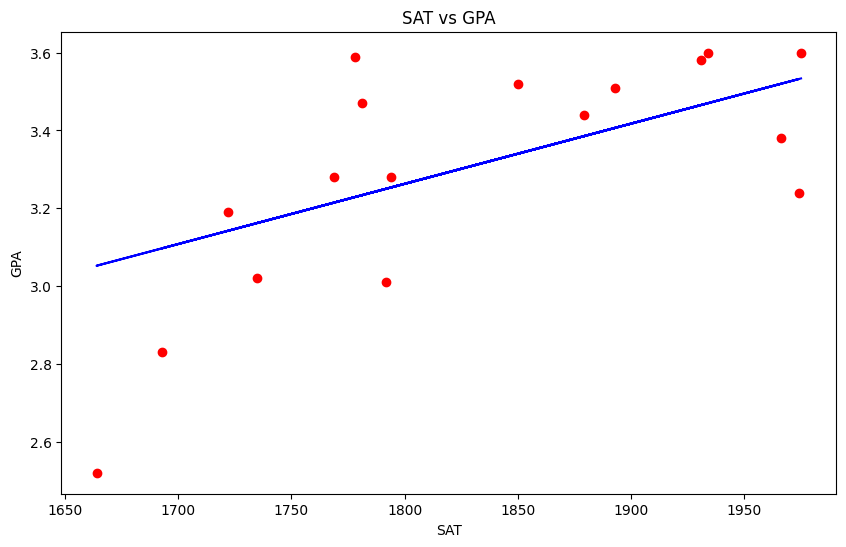

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.title("SAT vs GPA")
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()

In [15]:
model.score(x_test,y_test)

0.45830132470166596

In [16]:
from sklearn.ensemble import IsolationForest

In [17]:
clf = IsolationForest(random_state=10, contamination=0.1)
clf.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=10)

In [19]:
outliers = clf.predict(data)
cleaned_data = data[outliers==1]

In [20]:
cleaned_data.shape

(75, 2)

In [22]:
x = cleaned_data[['SAT']]
y = cleaned_data['GPA']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [36]:
model2 = LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred = model2.predict(x_test)

In [40]:
accuracy = model2.score(x_test,y_test)

In [41]:
accuracy

0.5028720377505446

In [42]:
coefficients = model2.coef_

mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
rss = ((y_pred-y_test)**2).sum()
r2_score = metrics.r2_score(y_test,y_pred)

In [43]:
print(f"Coefficients: {coefficients}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Residual Sum of Squares: {rss}")
print(f"R-Squared Score: {r2_score}")

Coefficients: [0.00120571]
Mean Squared Error: 0.016258514768928187
Mean Absolute Error: 0.10690612501848348
Residual Sum of Squares: 0.2438777215339228
R-Squared Score: 0.5028720377505446


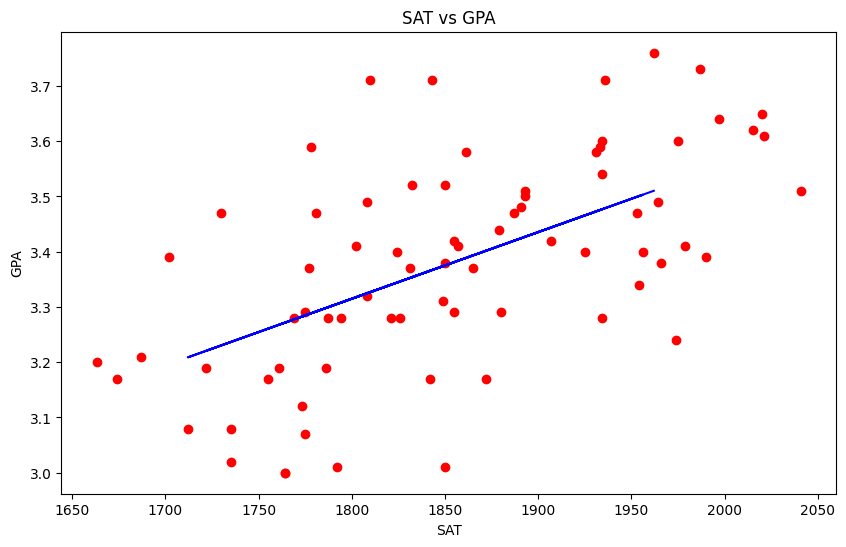

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.title("SAT vs GPA")
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()

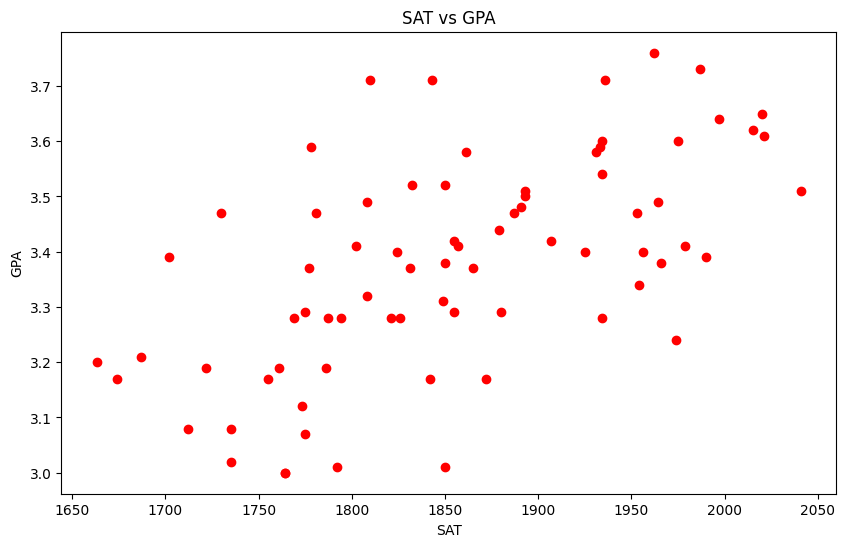

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(cleaned_data[['SAT']],cleaned_data['GPA'],color='red')
#plt.plot(x_test,y_pred,color='blue')
plt.title("SAT vs GPA")
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()

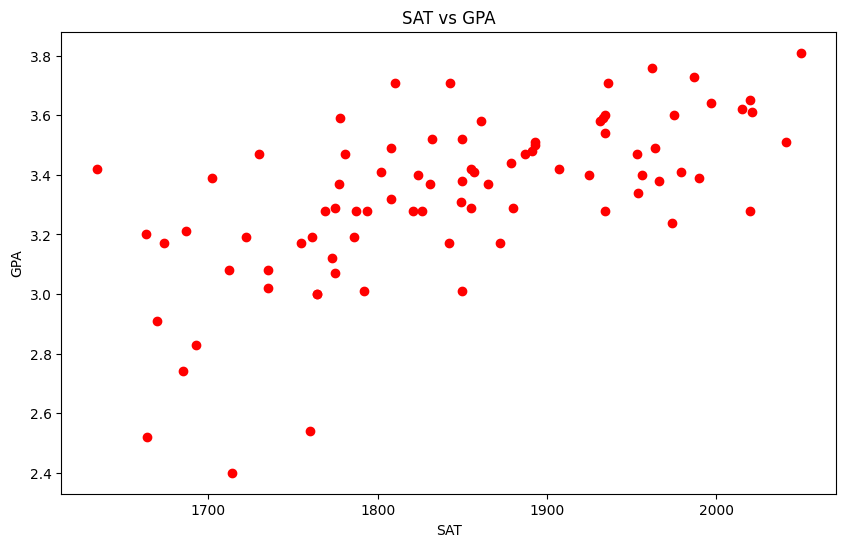

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(data[['SAT']],data['GPA'],color='red')
#plt.plot(x_test,y_pred,color='blue')
plt.title("SAT vs GPA")
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()